# **Tweets Sentiment Analysis**

![](https://miro.medium.com/max/1000/1*vp1M37AGMOFwCvLxVm62IA.jpeg)

# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# LOADING THE DATASET

In [2]:
data = pd.read_csv("../input/tweets-sentiment-analysis/train.csv", encoding='ISO-8859-1')

In [3]:
data

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [4]:
data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [6]:
data.describe()

,ItemID,Sentiment
count,99989.000000,99989.000000
mean,50005.110042,0.564632
std,28865.894393,0.495808
min,1.000000,0.000000
25%,25009.000000,0.000000
50%,50006.000000,1.000000
75%,75003.000000,1.000000
max,100000.000000,1.000000


In [7]:
data.value_counts()

ItemID  Sentiment  SentimentText                                                                                                                                   
1       0                               is so sad for my APL friend.............                                                                                       1
66656   0          @bluemoonx I did too...whatever u do, don't watch &quot;2 girls 1 cup&quot; on youtube. Gross!!! Lesbos sucking tits and eating their own crap.     1
66678   0          @blues_traveler I want the Tix!  Oh, right.  I'm know where near Vacaville Ca.                                                                      1
66677   0          @bluereadergal I prolly won't be home till 3-4am at this rate                                                                                       1
66676   1          @bluerain22 thank you  *hugs* it was lovely and romantic!                                                                                    

In [8]:
data.dtypes

ItemID            int64
Sentiment         int64
SentimentText    object
dtype: object

In [9]:
data.shape

(99989, 3)

In [10]:
data.columns

Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')

In [11]:
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ItemID,99989.0,50005.110042,28865.894393,1.0,25009.0,50006.0,75003.0,100000.0
Sentiment,99989.0,0.564632,0.495808,0.0,0.0,1.0,1.0,1.0


In [12]:
data.var()

ItemID       8.332399e+08
Sentiment    2.458251e-01
dtype: float64

# **Checking Null Values**

In [13]:
data.isnull().sum()


ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

In [14]:
data.isnull().any()


ItemID           False
Sentiment        False
SentimentText    False
dtype: bool

# **Exploratory Data Analysis**

In [15]:
data.corr()

,ItemID,Sentiment
ItemID,1.000000,0.079739
Sentiment,0.079739,1.000000


**HEATMAP**

**A heatmap is a graphical representation of data in two-dimension, using colors to demonstrate different factors. Heatmaps are a helpful visual aid for a viewer, enabling the quick dissemination of statistical or data-driven information.**

<AxesSubplot:>

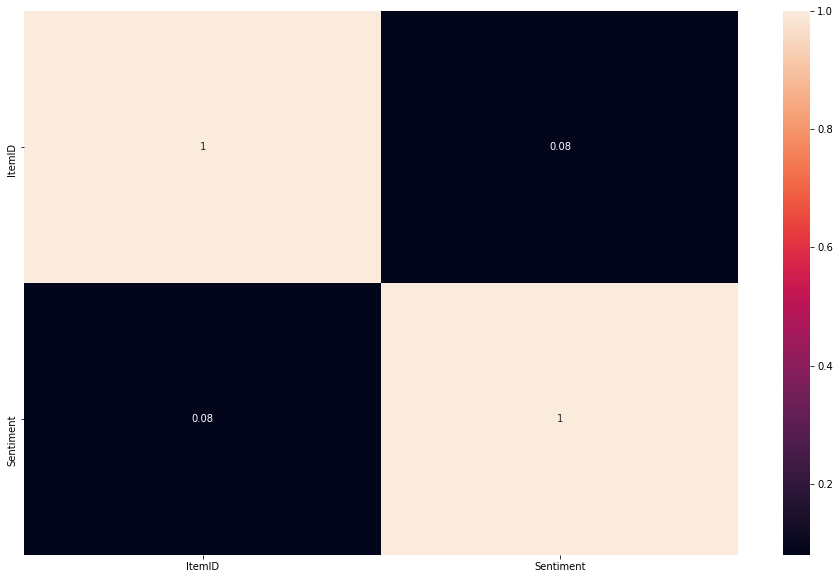

In [16]:
plt.figure(figsize = (16,10))

sns.heatmap(data.corr(), annot =True)


**HISTPLOT**

**Histograms represent the data distribution by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin. Seaborn comes with some datasets and we have used few datasets in our previous chapters.**


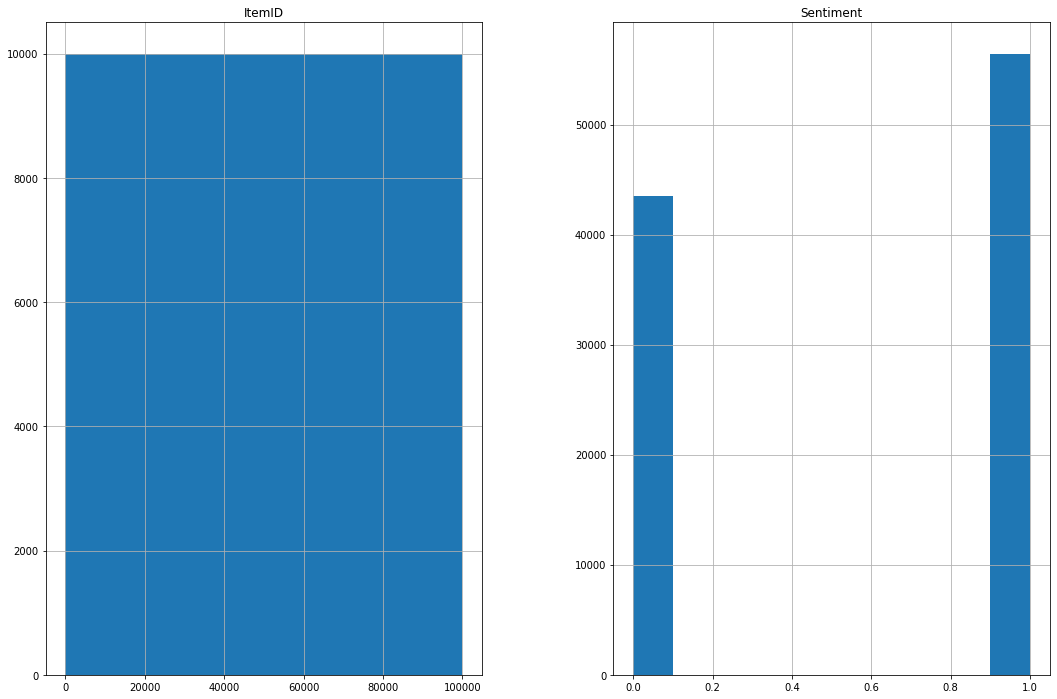

In [17]:
data.hist(figsize=(18,12))
plt.show()


**BARPLOT**

**A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.**


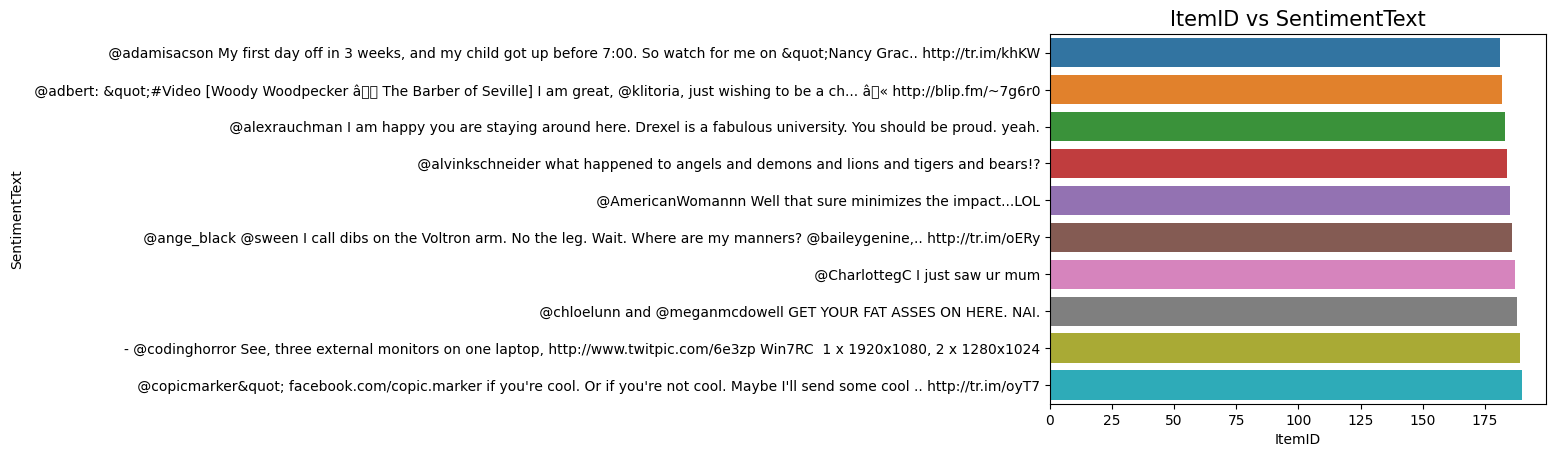

In [18]:
plt.style.use("default")
sns.barplot(x="ItemID", y="SentimentText",data=data[180:190])
plt.title("ItemID vs SentimentText",fontsize=15)
plt.xlabel("ItemID")
plt.ylabel("SentimentText")
plt.show()

**PAIRPLOT**

**pairplot() : To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.**

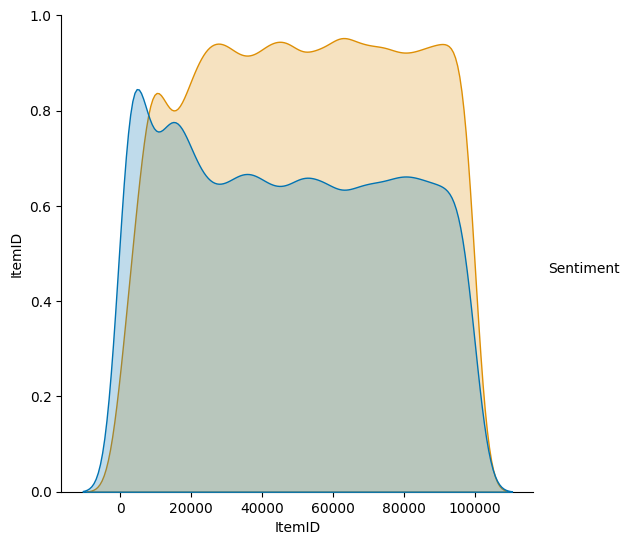

In [19]:
sns.set_palette("Paired")
sns.pairplot(data,hue='Sentiment',height=5.5,palette='colorblind')
plt.show()


In [20]:
data.columns

Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')

**BOXPLOT**

**A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.**

<AxesSubplot:xlabel='ItemID'>

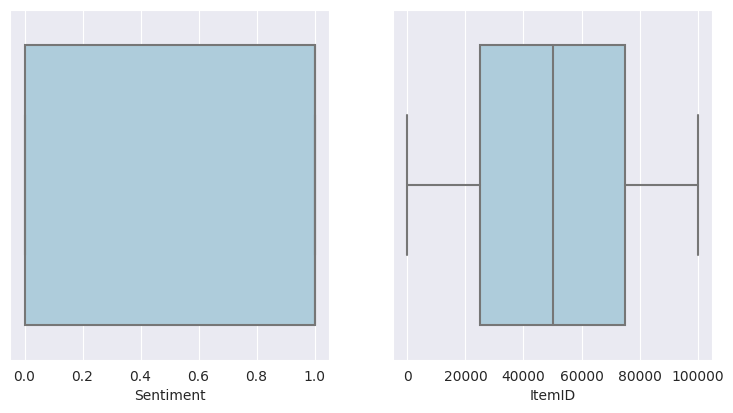

In [21]:

plt.figure(figsize=(14,10))
sns.set_style(style='darkgrid')
plt.subplot(2,3,1)
sns.boxplot(x='Sentiment',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='ItemID',data=data)


**KDE PLOT**

**Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables i.e. we can plot for the univariate or multiple variables altogether. Using the Python Seaborn module, we can build the Kdeplot with various functionality added to it.**


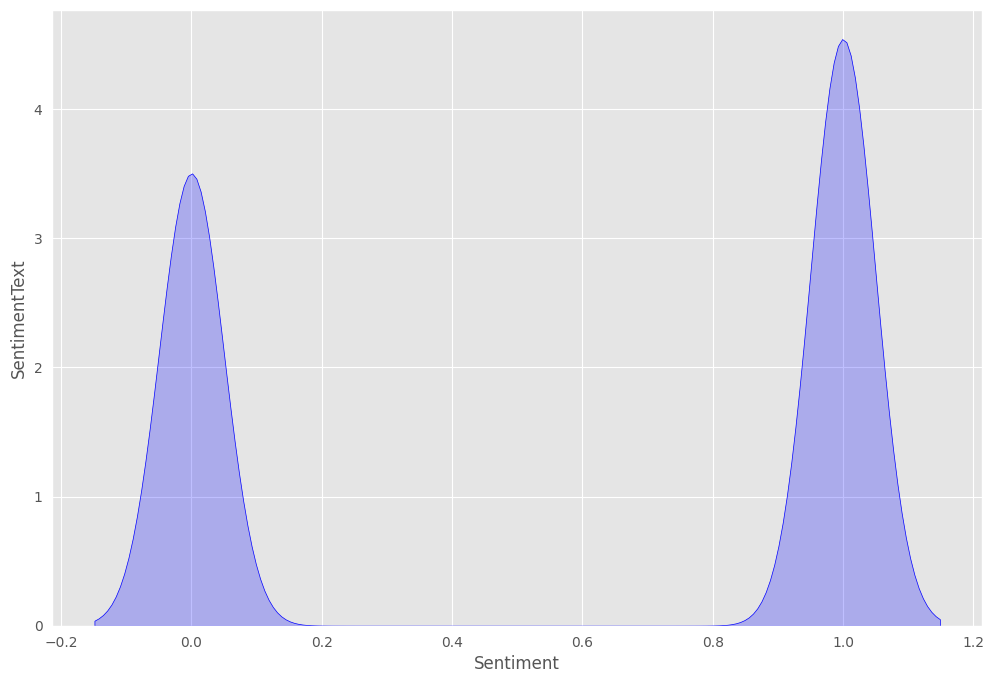

In [22]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
plt.xlabel('Sentiment')
plt.ylabel('SentimentText')
sns.kdeplot(data['Sentiment'],shade=True,color='blue')
plt.show()


# NLTK

In [23]:
import nltk
import scikitplot as skplt
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text


In [25]:
data['clean_text'] = data['SentimentText'].apply(clean_text)
data.head()


,ItemID,Sentiment,SentimentText,clean_text
0,1,0,is so sad for my APL frie...,sad apl friend
1,2,0,I missed the New Moon trail...,missed new moon trailer
2,3,1,omg its already 7:30 :O,omg already 7 30
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry dentist since 11 s...
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheating


In [26]:
X = data['clean_text']
y = data['Sentiment']


In [27]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
ps=PorterStemmer
words=word_tokenize('clean_text')


In [28]:
#importing the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#lemmatizer=WordNetLemmatizer()


In [29]:
#define a function to get rid of stopwords present in the messages
def message_text_process(mess):
    # Check characters to see if there are punctuations 
    no_punctuation=[char for char in mess if char not in string.punctuation]
    # now form the sentence
    no_punctuation=''.join(no_punctuation)
    # Now eliminate any stopwords
    return[word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]


In [30]:
data['SentimentText'].head(5).apply(message_text_process)


0                                   [sad, APL, friend]
1                         [missed, New, Moon, trailer]
2                                  [omg, already, 730]
3    [Omgaga, Im, sooo, im, gunna, CRy, Ive, dentis...
4                        [think, mi, bf, cheating, TT]
Name: SentimentText, dtype: object

In [31]:
# start text processing with vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [33]:
def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    
    print("Training Score:\n",pipeline_model.score(x_train,y_train)*100)


    y_pred = pipeline_model.predict(x_test)
    y_probas =pipeline_model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.estimators.plot_learning_curve(pipeline_model, X,y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.metrics.plot_lift_curve(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1)
    plt.show()
    print(classification_report(y_test, y_pred))


# **MODEL BUILDING**

**LOGISTIC REGRESSION**

**Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).**


Accuracy: 75.0260020801664
Training Score:
 83.70204424530944


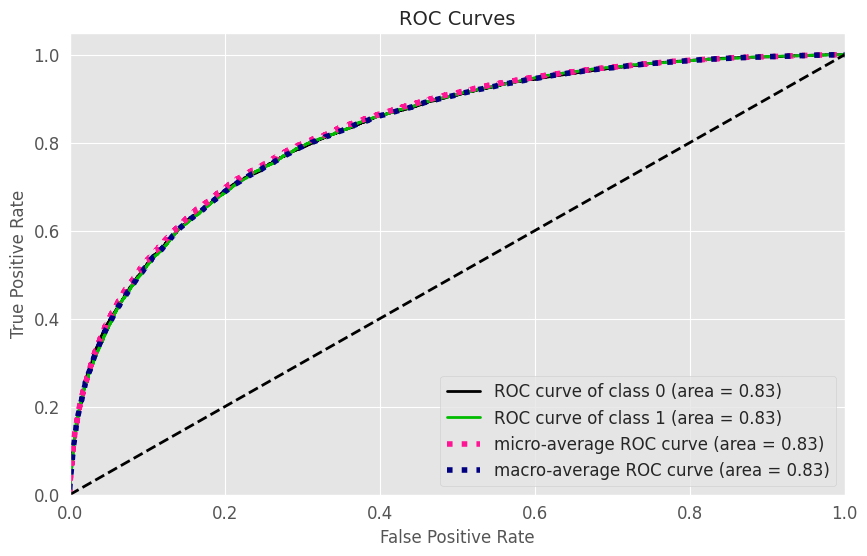

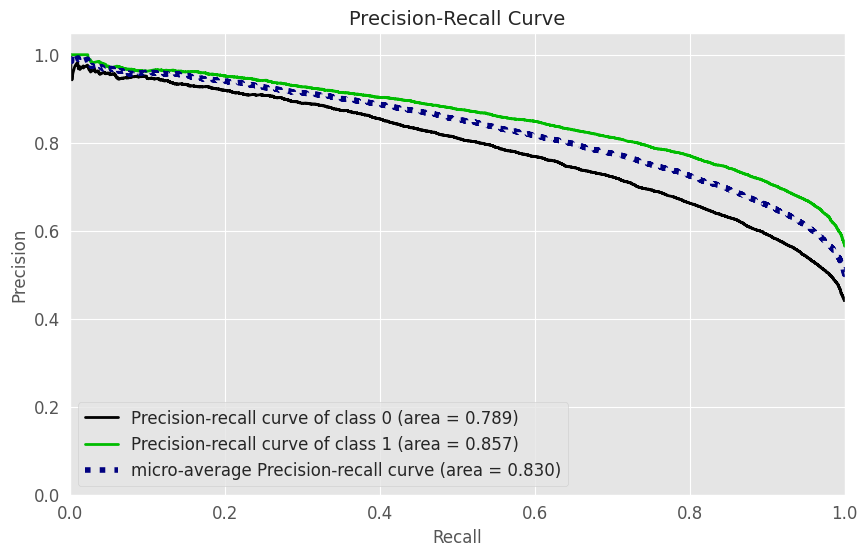

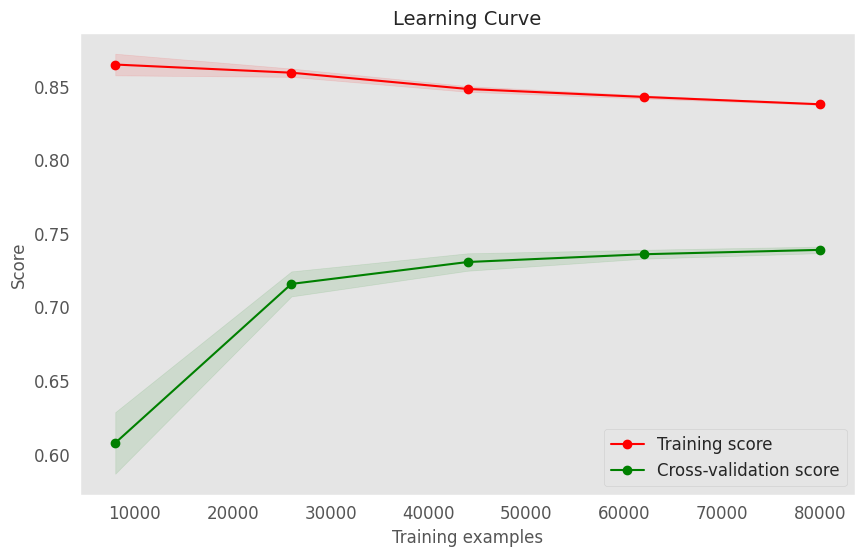

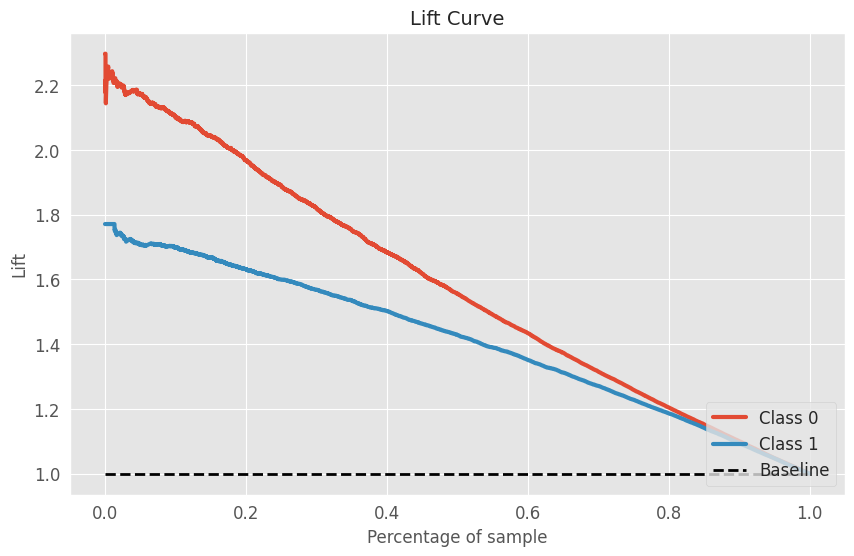

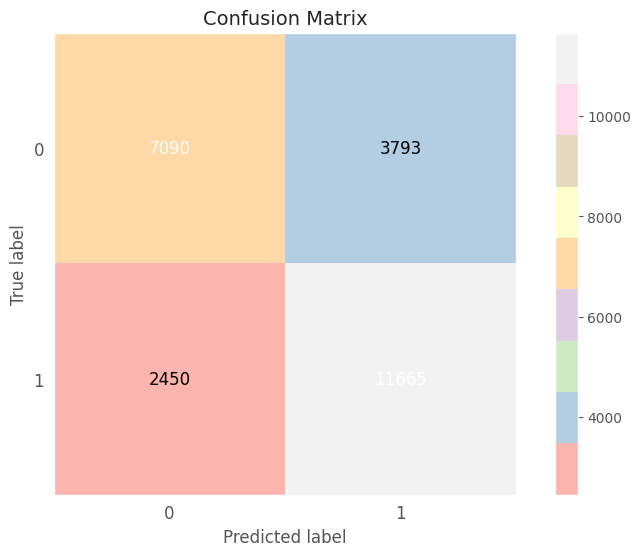

              precision    recall  f1-score   support

           0       0.74      0.65      0.69     10883
           1       0.75      0.83      0.79     14115

    accuracy                           0.75     24998
   macro avg       0.75      0.74      0.74     24998
weighted avg       0.75      0.75      0.75     24998



In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)


**Decision Tree Classifier**

**Decision Trees are a non-parametric supervised learning method used for both classification and regression tasks. ... Tree models where the target variable can take a discrete set of values are called classification trees.**


Accuracy: 57.71661732938635
Training Score:
 57.870944513341605


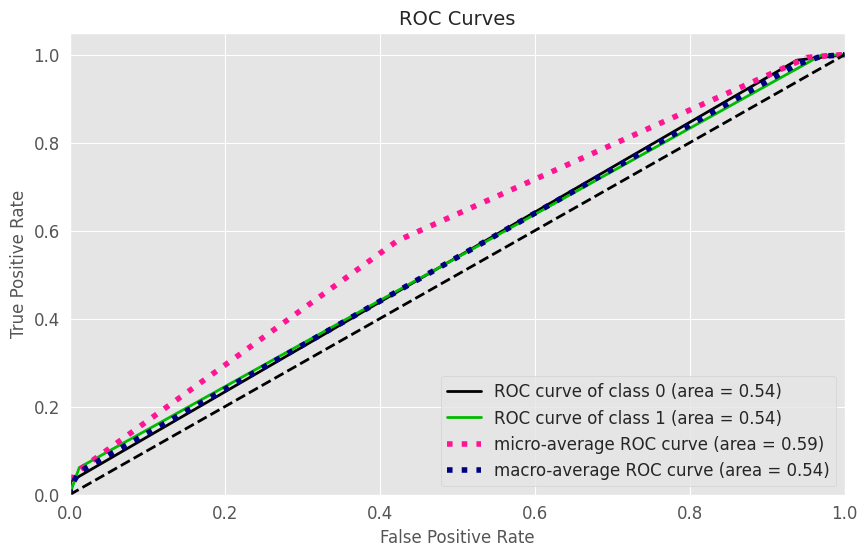

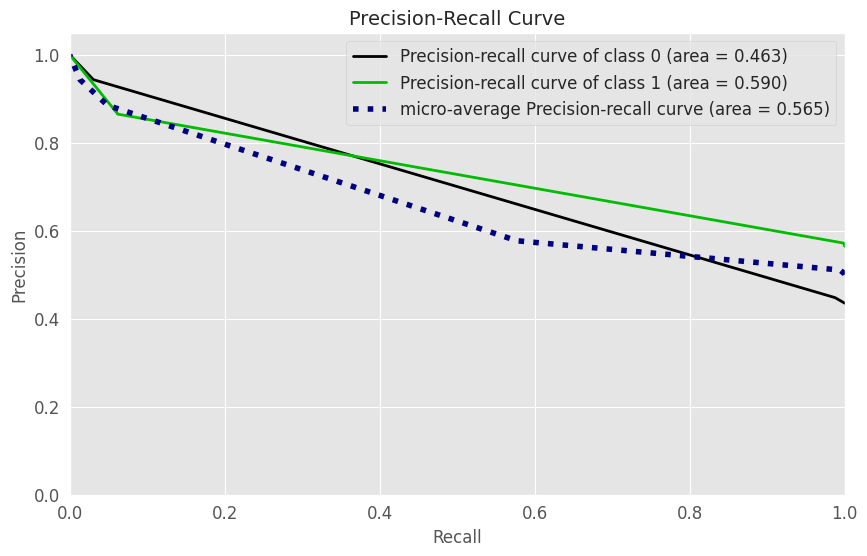

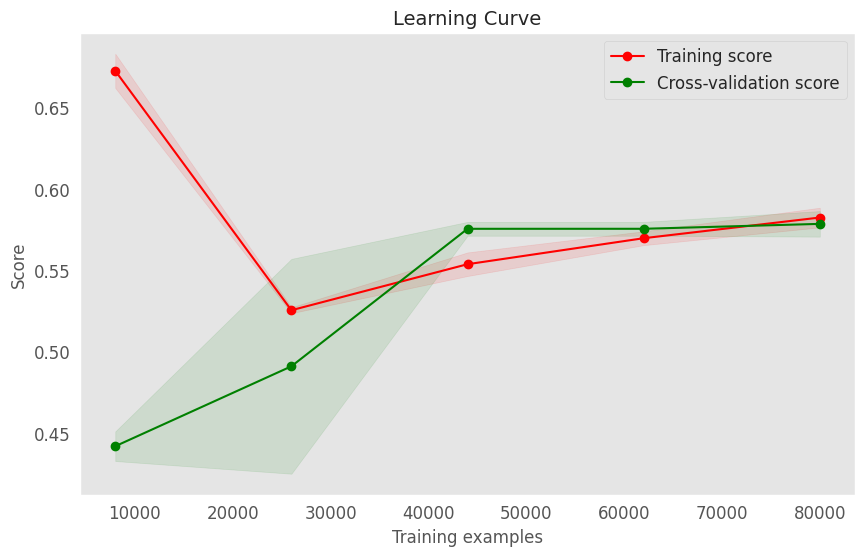

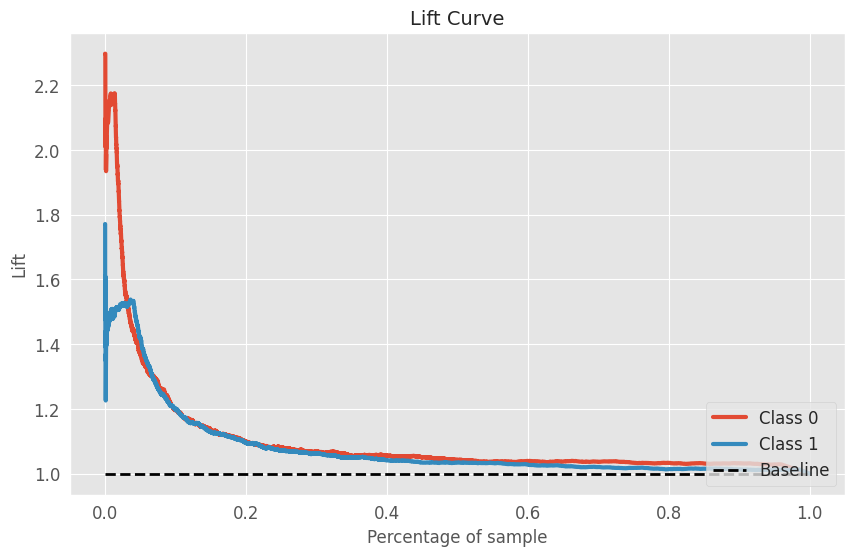

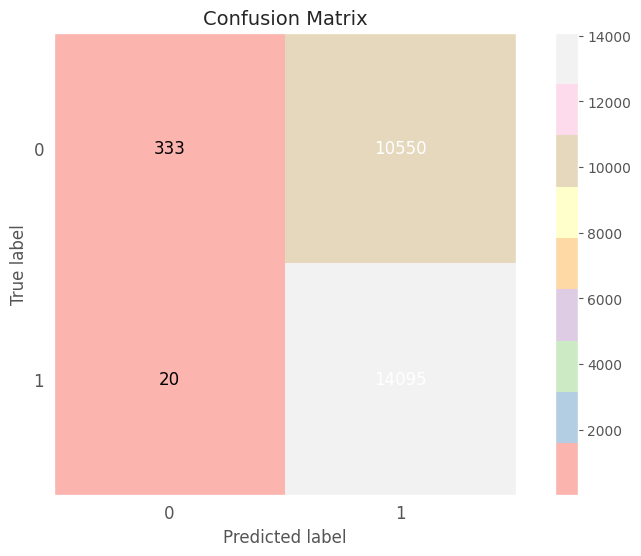

              precision    recall  f1-score   support

           0       0.94      0.03      0.06     10883
           1       0.57      1.00      0.73     14115

    accuracy                           0.58     24998
   macro avg       0.76      0.51      0.39     24998
weighted avg       0.73      0.58      0.44     24998



[Text(248.0, 308.0, 'X[71753] <= 0.125\ngini = 0.492\nsamples = 74991\nvalue = [32649, 42342]'),
 Text(124.0, 184.79999999999998, 'X[77716] <= 0.061\ngini = 0.489\nsamples = 73793\nvalue = [31523, 42270]'),
 Text(62.0, 61.599999999999966, 'gini = 0.493\nsamples = 70742\nvalue = [31143, 39599]'),
 Text(186.0, 61.599999999999966, 'gini = 0.218\nsamples = 3051\nvalue = [380, 2671]'),
 Text(372.0, 184.79999999999998, 'X[51428] <= 0.25\ngini = 0.113\nsamples = 1198\nvalue = [1126, 72]'),
 Text(310.0, 61.599999999999966, 'gini = 0.109\nsamples = 1194\nvalue = [1125, 69]'),
 Text(434.0, 61.599999999999966, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]')]

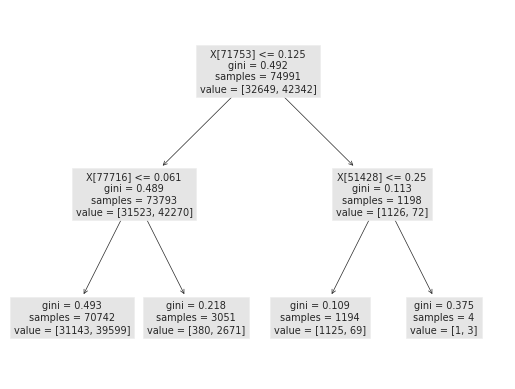

In [35]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth = 2)
classify(tree_clf,X,y)
tree.plot_tree(tree_clf)


**NAIVE BAYES**

**Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. ... Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.**

**In Naive Bayes we can use :**

*** GaussianNB**

*** BernoulliNB**

*** MultinomialNB**




Accuracy: 73.49787983038642
Training Score:
 87.49316584656826


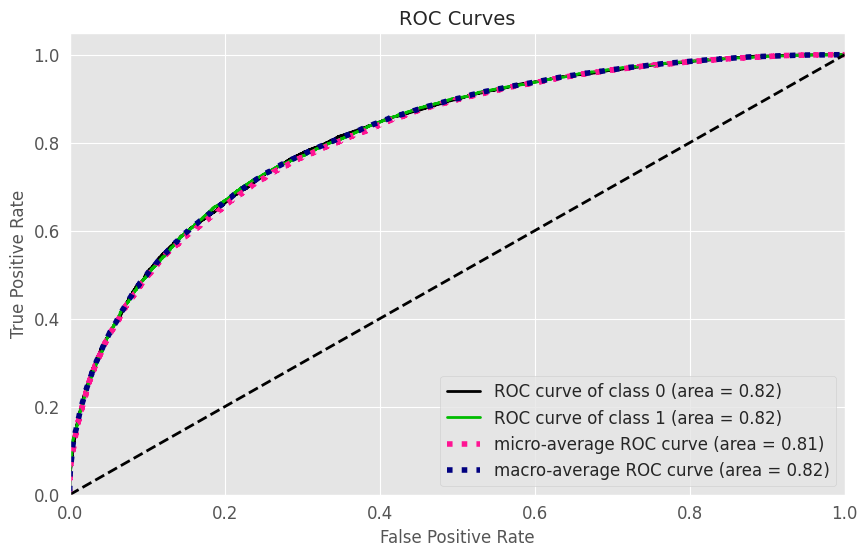

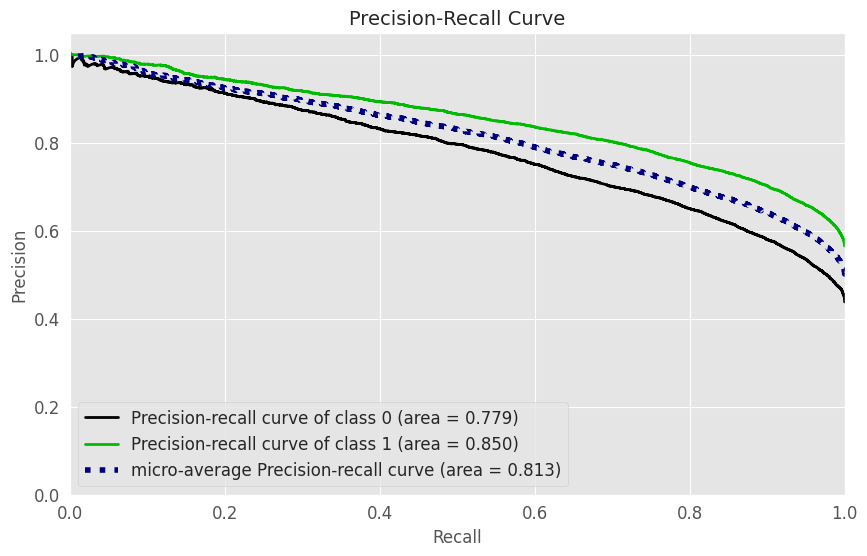

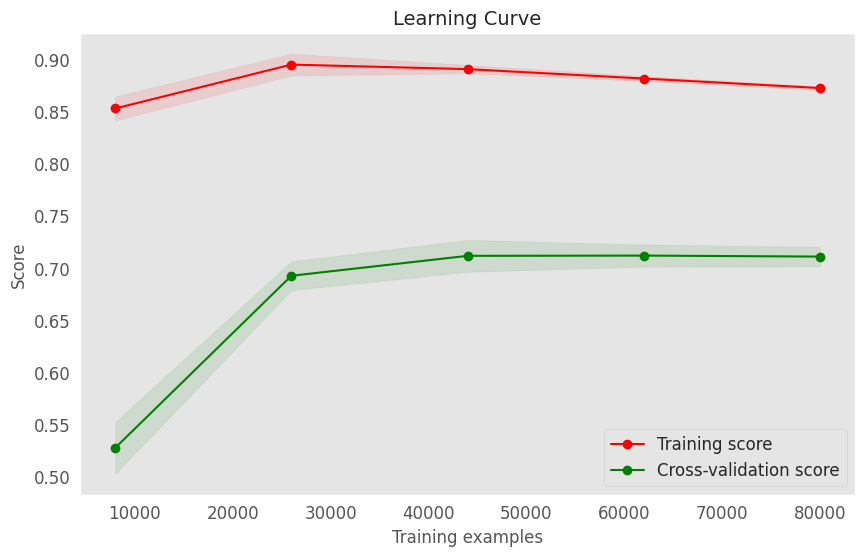

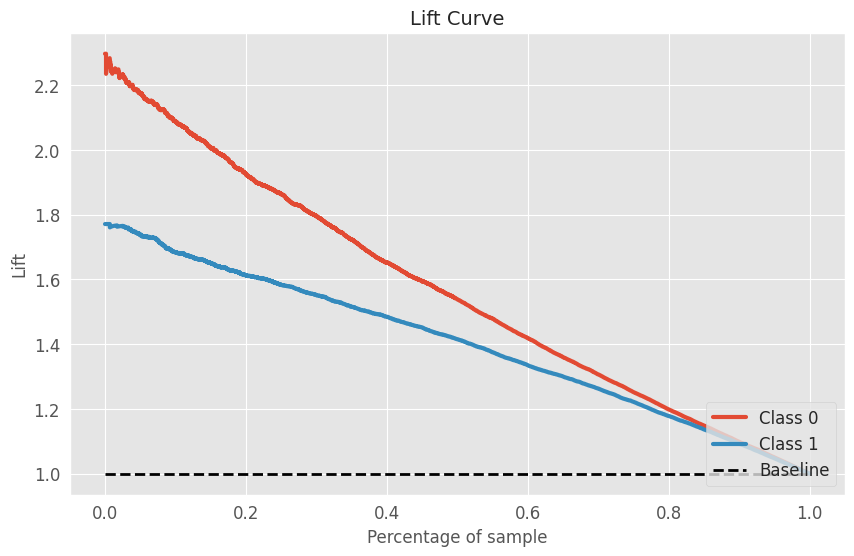

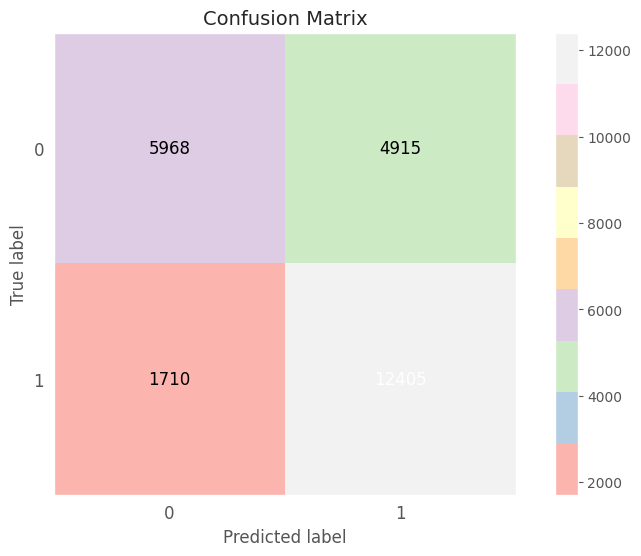

              precision    recall  f1-score   support

           0       0.78      0.55      0.64     10883
           1       0.72      0.88      0.79     14115

    accuracy                           0.73     24998
   macro avg       0.75      0.71      0.72     24998
weighted avg       0.74      0.73      0.73     24998



In [36]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)



**ADA BOOST CLASSIFIER**

**Ada-boost or Adaptive Boosting is one of ensemble boosting classifier proposed by Yoav Freund and Robert Schapire in 1996. It combines multiple classifiers to increase the accuracy of classifiers. ... Any machine learning algorithm can be used as base classifier if it accepts weights on the training set.**

Accuracy: 67.03336266901351
Training Score:
 67.22673387473164


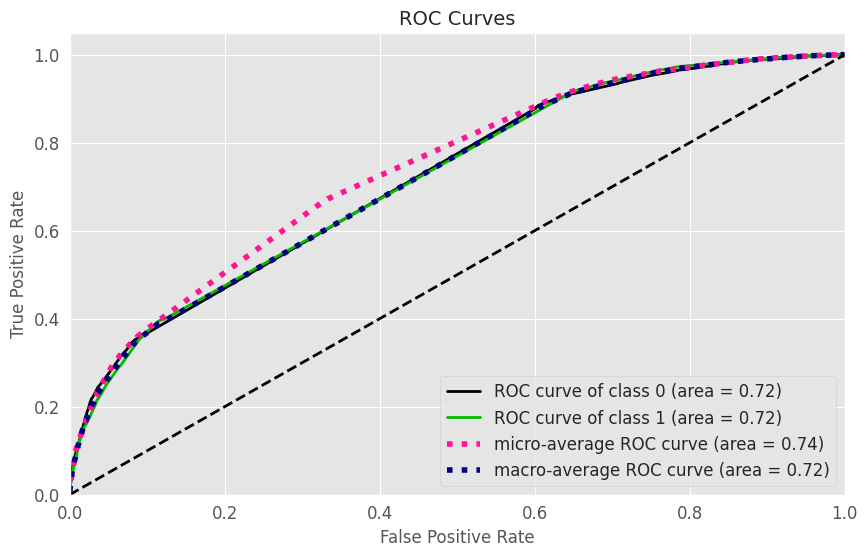

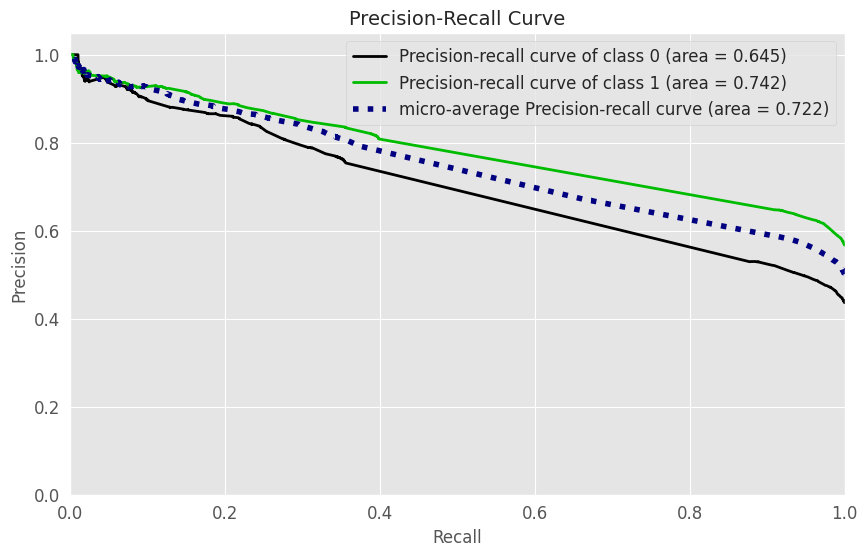

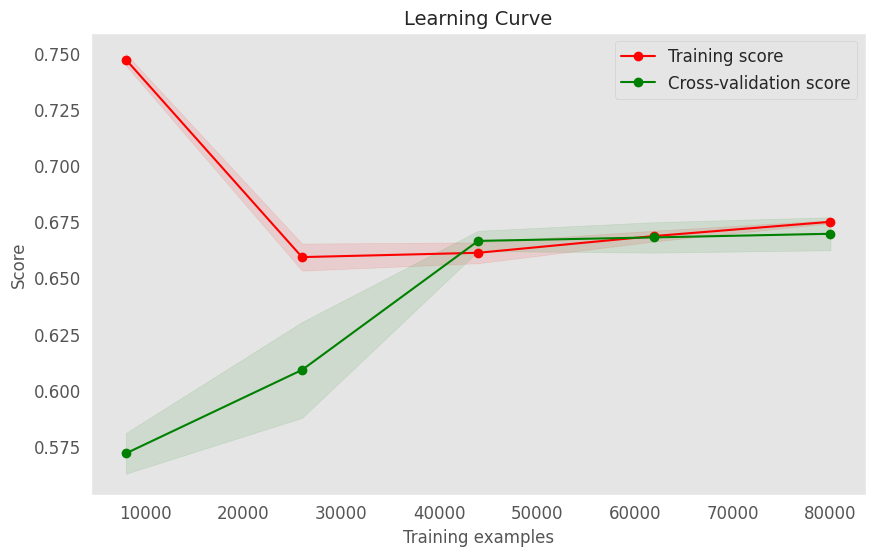

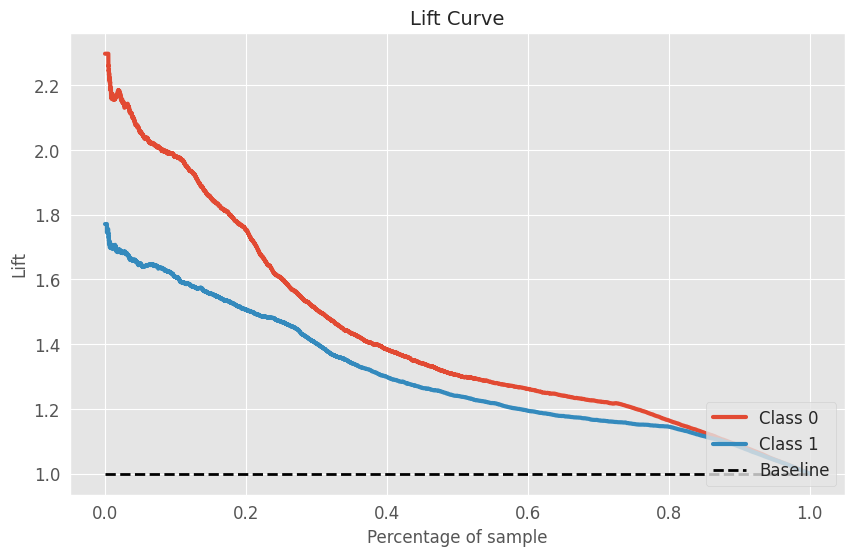

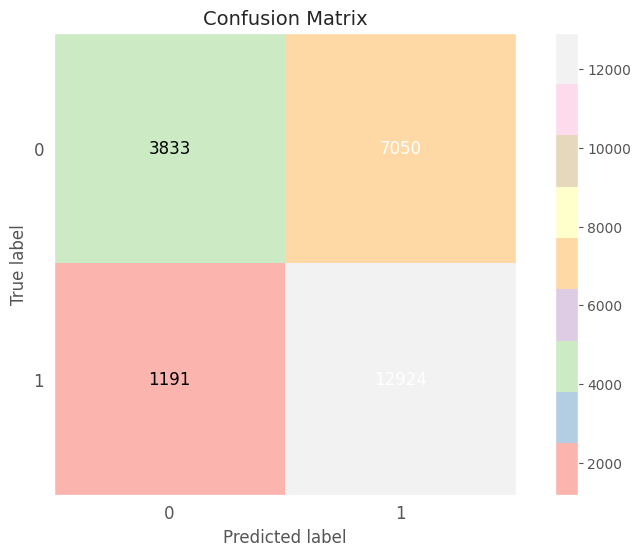

              precision    recall  f1-score   support

           0       0.76      0.35      0.48     10883
           1       0.65      0.92      0.76     14115

    accuracy                           0.67     24998
   macro avg       0.70      0.63      0.62     24998
weighted avg       0.70      0.67      0.64     24998



In [37]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier(base_estimator = None)
classify(model, X, y)


**Conclusion**

**From executing all the algorithms , Naive Bayes got a training accuracy of 88% , then logistic regression with 84% training accuracy score which is quite well for the given dataset**

**Thank You**